Para hacer que el código sea más entendible trabajamos todo con funciones, no con codigo suelto.

In [ ]:
  import gdown
  !pip install -q gdown
  import pandas as pd
  from datetime import datetime
  import matplotlib.pyplot as plt
  import seaborn as sns

In [ ]:
def importar_datos(id_drive): #Le paso el id del archivo drive y me retorna el dataframe.
  !gdown --id {id_drive} --output metro_dataset.csv
  data = pd.read_csv("metro_dataset.csv")
  return data

df=importar_datos("1URc9Dfteig1ZlH36xdJ1dE_twfZyoQAq")
df.head()

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1URc9Dfteig1ZlH36xdJ1dE_twfZyoQAq
From (redirected): https://drive.google.com/uc?id=1URc9Dfteig1ZlH36xdJ1dE_twfZyoQAq&confirm=t&uuid=eb8e1d53-2ab8-4032-9e56-b359ac114854
To: /content/metro_dataset.csv
100% 218M/218M [00:03<00:00, 63.4MB/s]


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
def estado(fecha): #Función  auxiliar para identificar si un instante de tiempo t(x) se encuentra dentro de algún intervalo donde el compresor reporta fallas.
    #Lista de períodos de fallas (reportado en la descripción del dataset).
    fallas = [
        (datetime(2020, 4, 18, 0, 0), datetime(2020, 4, 18, 23, 59)),
        (datetime(2020, 5, 29, 23, 30), datetime(2020, 5, 30, 6, 0)),
        (datetime(2020, 6, 5, 10, 0), datetime(2020, 6, 7, 14, 30)),
        (datetime(2020, 7, 15, 14, 30), datetime(2020, 7, 15, 19, 0))
    ]

    #Verificamos si la fecha está dentro de algún período
    for inicio, fin in fallas:
      if inicio <= fecha <= fin:
            return 1
    return 0
    #Retorna 1 si se encuentra en un lapso de falla y 0 si está funcionando normalmente.


In [ ]:
def estandarizar(dtfr): #Formateamos el tipo de dato de fecha en timestamp. Analizamos valores nulos y datos duplicados.
  dtfr["timestamp"]=pd.to_datetime(dtfr["timestamp"])
  nulos=df.isnull().values.any() #Busca si hay algún valor nulo en el dataset
  duplicados=df.duplicated().any() #Busca si hay filas repetidas.
  if nulos==False:
    print("No hay datos nulos en el dataset.")
  else:
    print("Revisar nulos por columna.")
  if duplicados==False:
    print("No hay filas duplicadas en el dataset.")
  else:
    print("Revisar duplicados.")
  df['estado'] = df['timestamp'].apply(estado) #Aplico la función para crear la columna "estado". En caso de que el valor sea 0 no falla, si es 1 el compresor detecta anomalías en ese momento.

estandarizar(df)


No hay datos nulos en el dataset.
No hay filas duplicadas en el dataset.


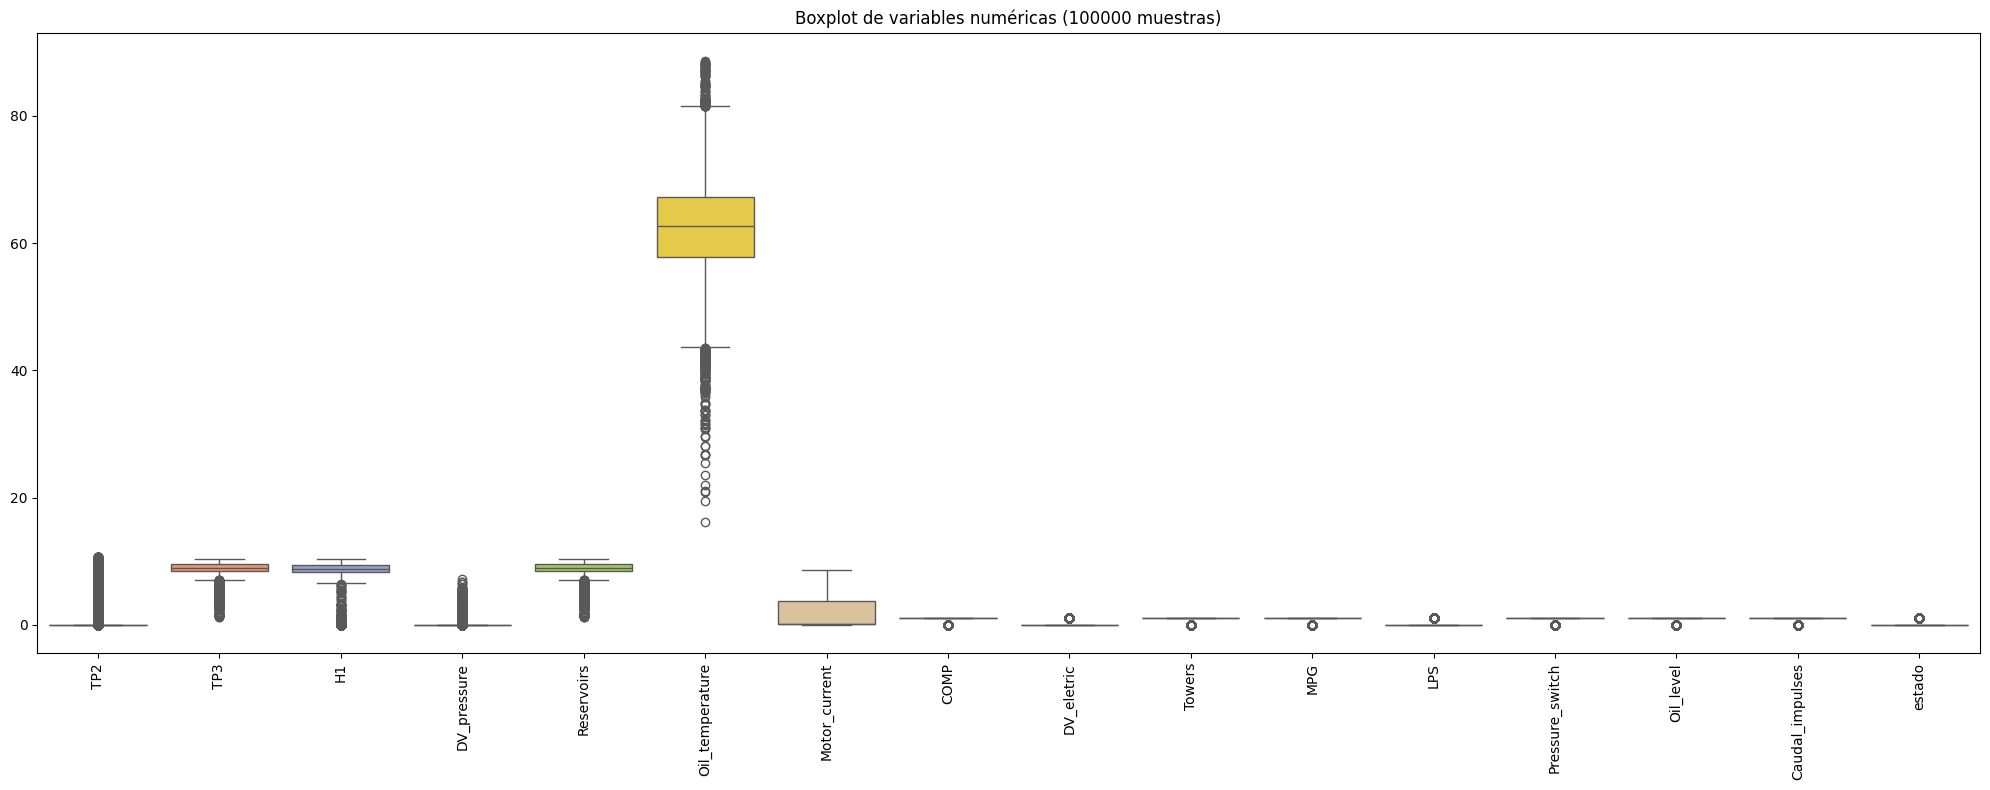

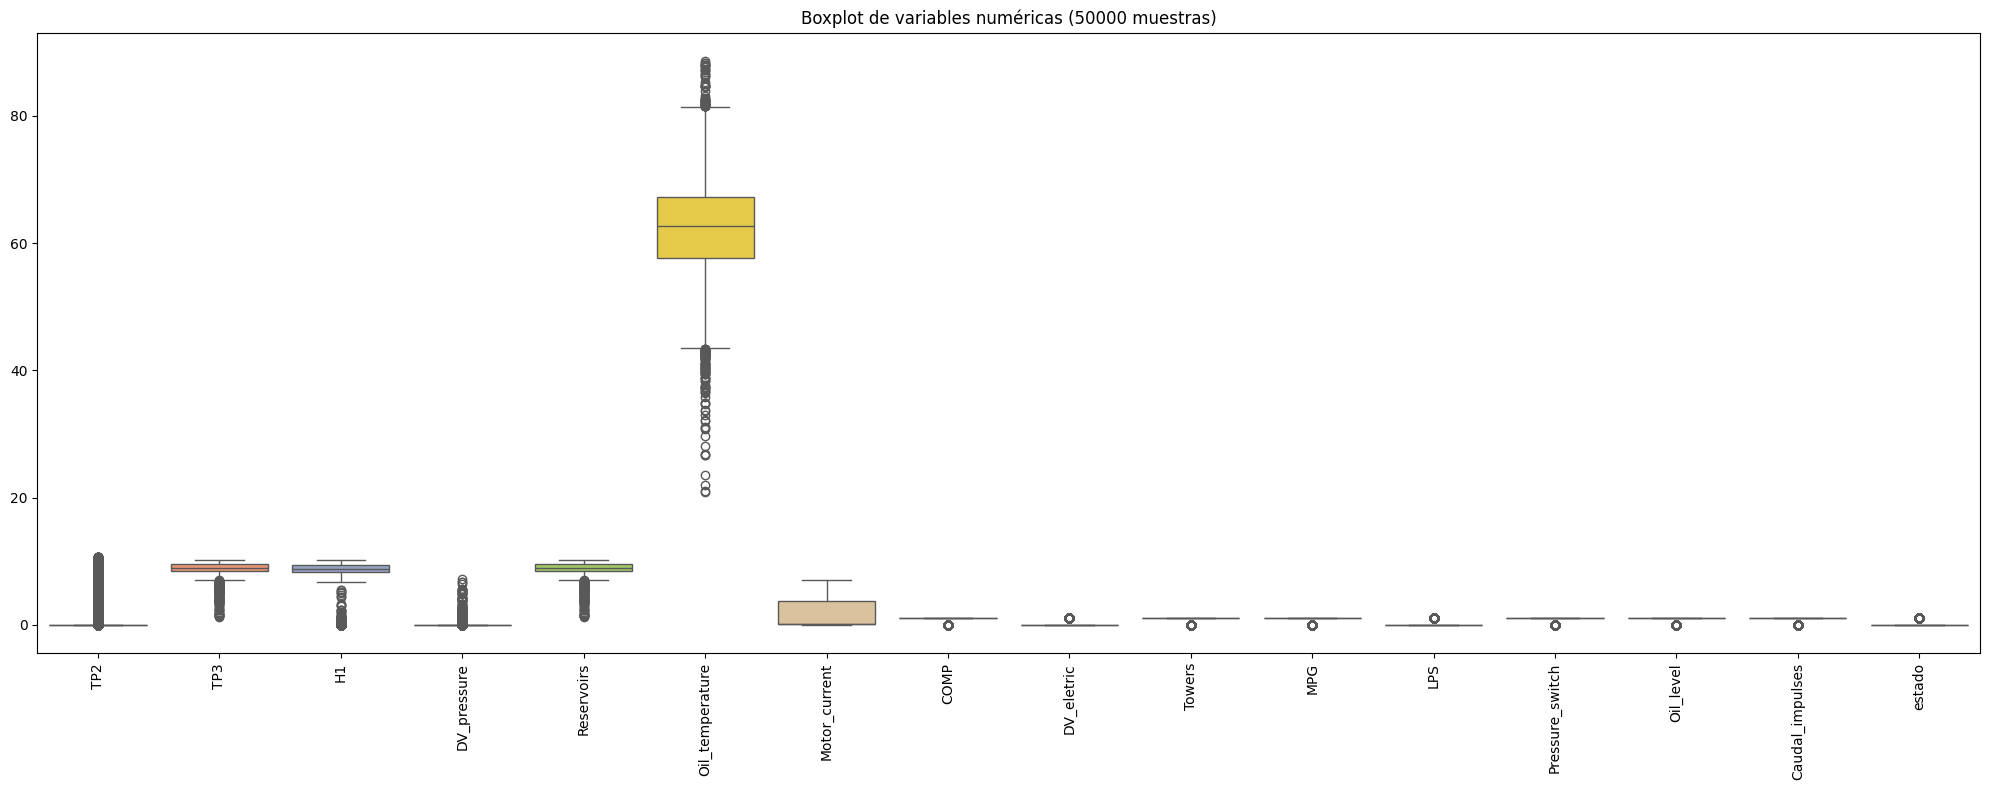

In [ ]:
def boxplot_variables(df, sample_size): #Genera boxplots de todos los valores de sensores para ir viendo a simple vista si hay valores negativos o muchos outliers.
    #Sample_size sirve para elegir la cantidad de muestras para el gráfico en caso de querer acelerar la ejecución (pasar None para usar todo el DataFrame)

    #Deja solo las columnas de sensores
    columnas_numericas = df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore')

    #Aplico muestreo en caso de haberlo pasado
    if sample_size is not None and sample_size < len(columnas_numericas):
        columnas_numericas = columnas_numericas.sample(sample_size, random_state=42)

    #Creo gráfico
    plt.figure(figsize=(20, 8))
    sns.boxplot(data=columnas_numericas, palette='Set2')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot de variables numéricas ({sample_size} muestras)' if sample_size else 'Boxplot de variables numéricas')
    plt.tight_layout()
    plt.show()

boxplot_variables(df, sample_size=100000)  # Con 100k registros
#boxplot_variables(df, sample_size=None)  # Con todos (más lento)
boxplot_variables(df, sample_size=50000)  # Con menos aún


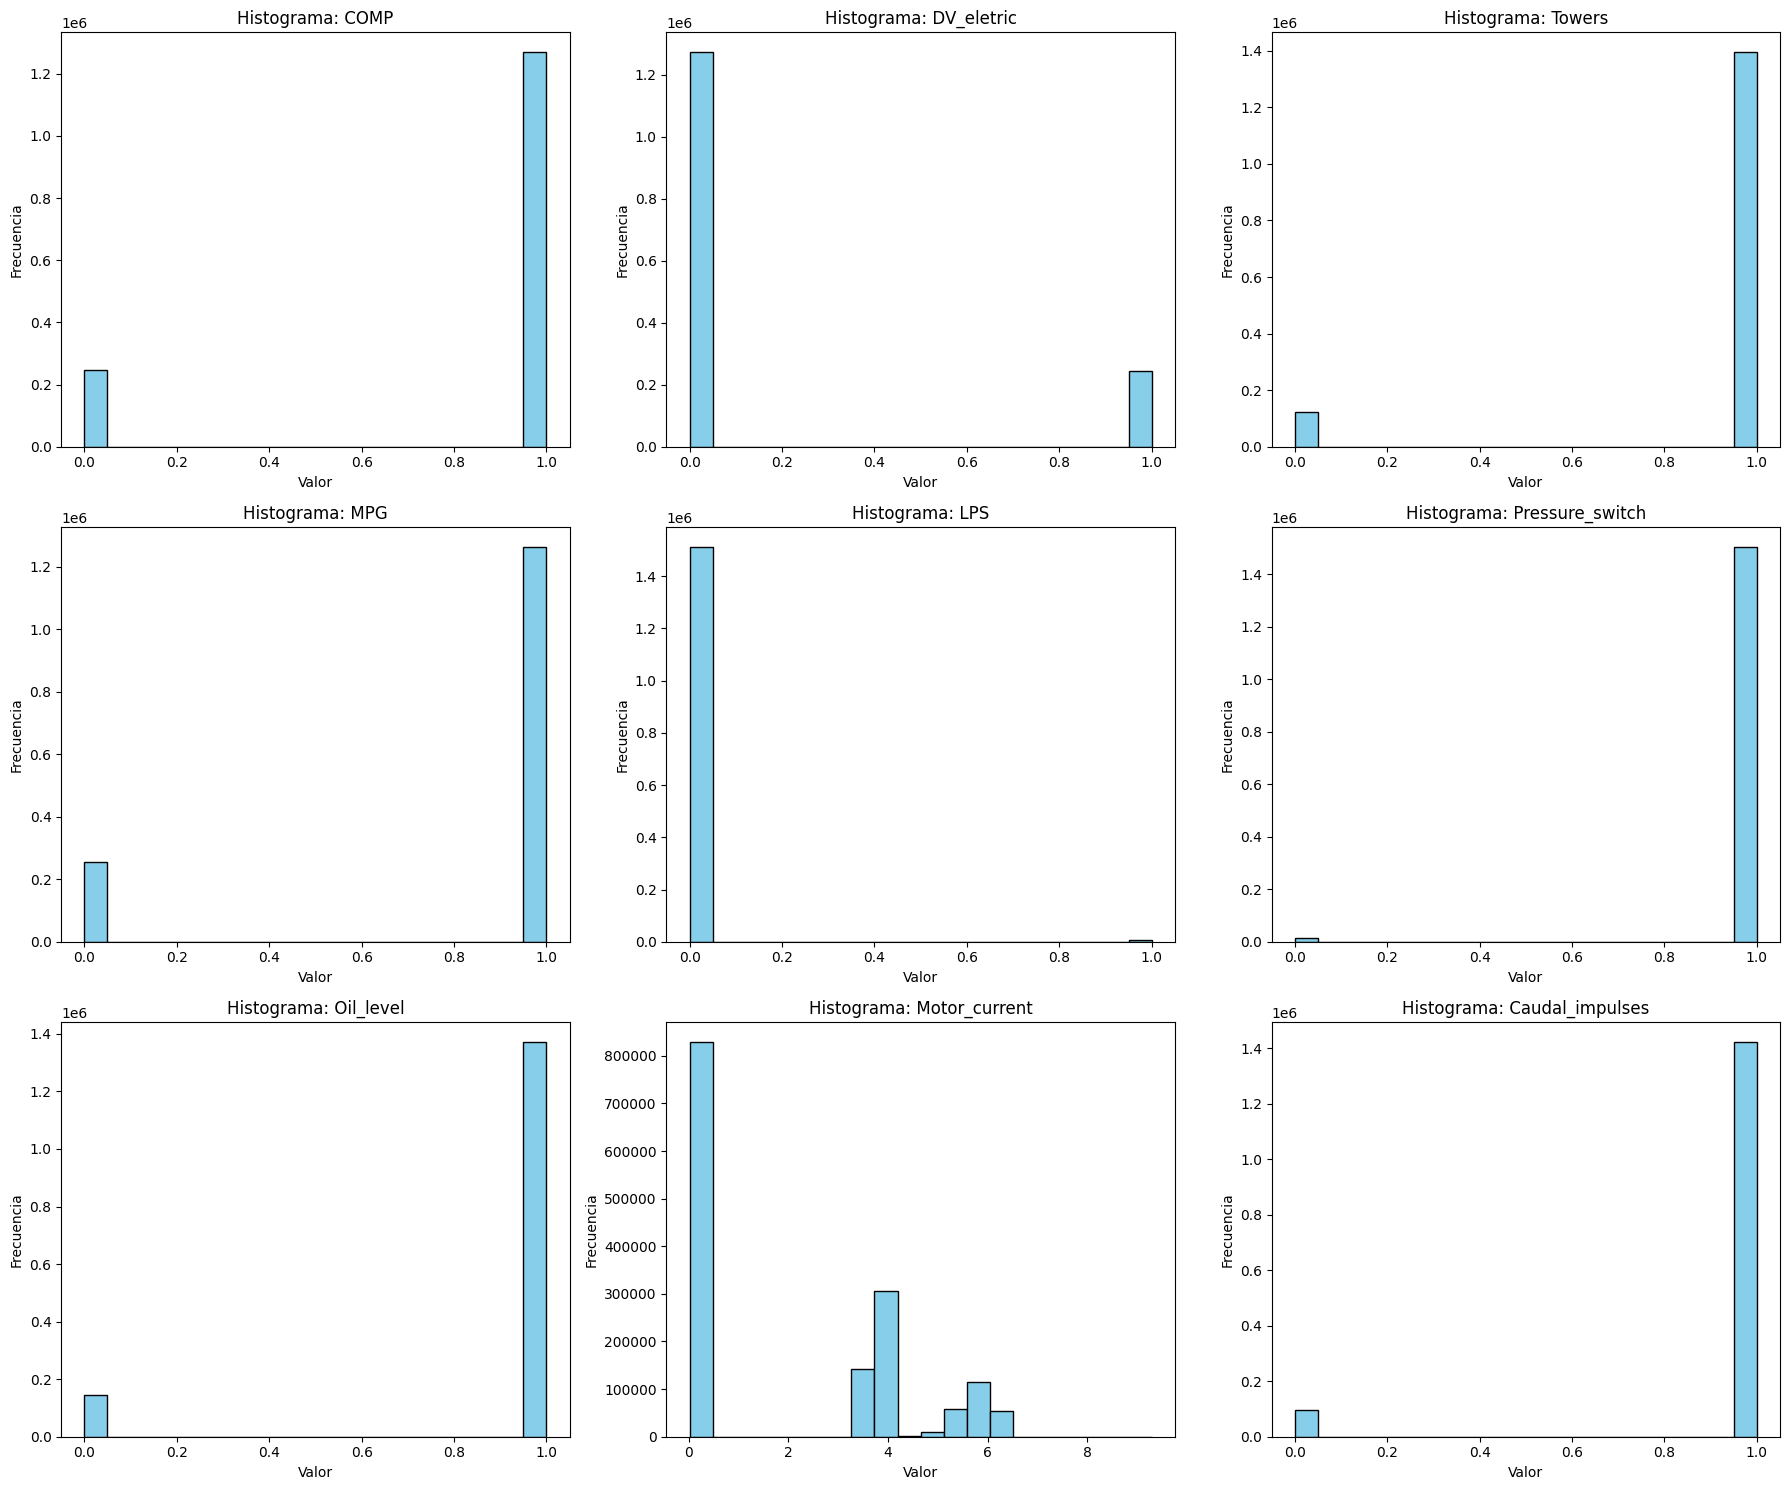

In [ ]:
def histogramas_discretas(df, columnas): #ES UNA FUNCIÓN "DESCARTE", PARA CHEQUEAR QUE LOS TIPOS DE DATOS SEAN COMO TIENEN QUE SER.
    #LUEGO SE HARÁ UN ANÁLISIS ESTÁDISTICO DE LAS VARIABLES IMPORTANTES EN UNA ETAPA MÁS DETALLADA.
    """
    Genera histogramas para variables discretas o booleanas.

    Parámetros:
    - df: DAdas
    - columnas: lista de nombres de columnas a graficar
    """

    n = len(columnas)
    filas = (n + 2) // 3  # Calcular cuántas filas de subplots hacen falta

    fig, axes = plt.subplots(nrows=filas, ncols=3, figsize=(18, 5 * filas))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histograma: {col}')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frecuencia')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

columnas_bool_discretas = [
    'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
    'Pressure_switch', 'Oil_level', 'Motor_current', 'Caudal_impulses'
]

histogramas_discretas(df, columnas_bool_discretas)


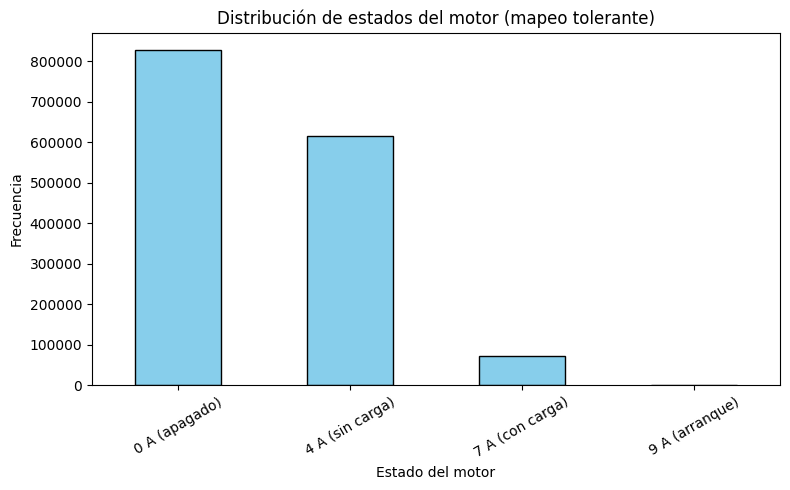

,count
Motor_current,
0 A (apagado),829124
4 A (sin carga),616160
7 A (con carga),71657
9 A (arranque),7


In [ ]:
'''
Motor_current da valores float ya que el sensor no es exacto, muchas veces da 6,9 en vez de 7 por ejemplo. Por eso en el histograma se ven muchas observaciones en el medio cuando en realidad solamente hay 4 tipos de datos para esta variable..
Los valores enteros representan la medida de la corriente de una fase del motor trifásico. Cada valor indica
Con esta función lo redonde y printeamos como sería el valor teórico.
'''
def clasificar_motor_current_tolerante(df):
    """
    Clasifica 'Motor_current' en estados operativos usando rangos extendidos.
    Genera un gráfico y devuelve el recuento por categoría.
    """
    def clasificar(valor):
        if pd.isna(valor):
            return 'NaN'
        elif valor < 2:
            return '0 A (apagado)'
        elif valor < 6:
            return '4 A (sin carga)'
        elif valor < 9:
            return '7 A (con carga)'
        elif valor<12:
            return '9 A (arranque)'


    clasificado = df['Motor_current'].apply(clasificar)
    recuento = clasificado.value_counts().sort_index()

    # Gráfico
    plt.figure(figsize=(8, 5))
    recuento.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribución de estados del motor (mapeo tolerante)')
    plt.ylabel('Frecuencia')
    plt.xlabel('Estado del motor')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    return recuento
clasificar_motor_current_tolerante(df)



El gráfico muestras que no hay outliers significativos, en el medio pueden variar datos del sensor según la interpretación que se le de al mapeo. Es decir a veces el valor no está en 0A ni 4A, está en 3 o 1, no es tán claro como si fuese una diferencia decimal (ej: 0,1 y 0 ó 7,3 y 7). Entoneces, para no introducir un sesgo manual por establecer un criterio de redondeo arbitrário, vamos a trabajar con los datos de las variables originales.

Otra cosa a tener en cuenta: Por qué hay tan pocos casos de arranque? Al tratarse de motores industriales de mucha potencia es altamente probable que el pico de tensión que producen, se produzca en un lapso muy corto de tiempo. Hablamos de un tiempo de milisegundos, lo cual implica una frecuencia de muestreo menor a la nuestra (1hz = 1s). Quizás haya muchos casos donde los sensores no toman este valor porque simplemente no lo detectan por culpa de la frecuencia de muestreo.

Correlación entre features. El objetivo es Calcular la matriz de correlación, identificar multicolinealidad y variables explicativas. Marcar variables candidatas a eliminar y seleccionar variables de mayor importancia.



# CORRELACION
    

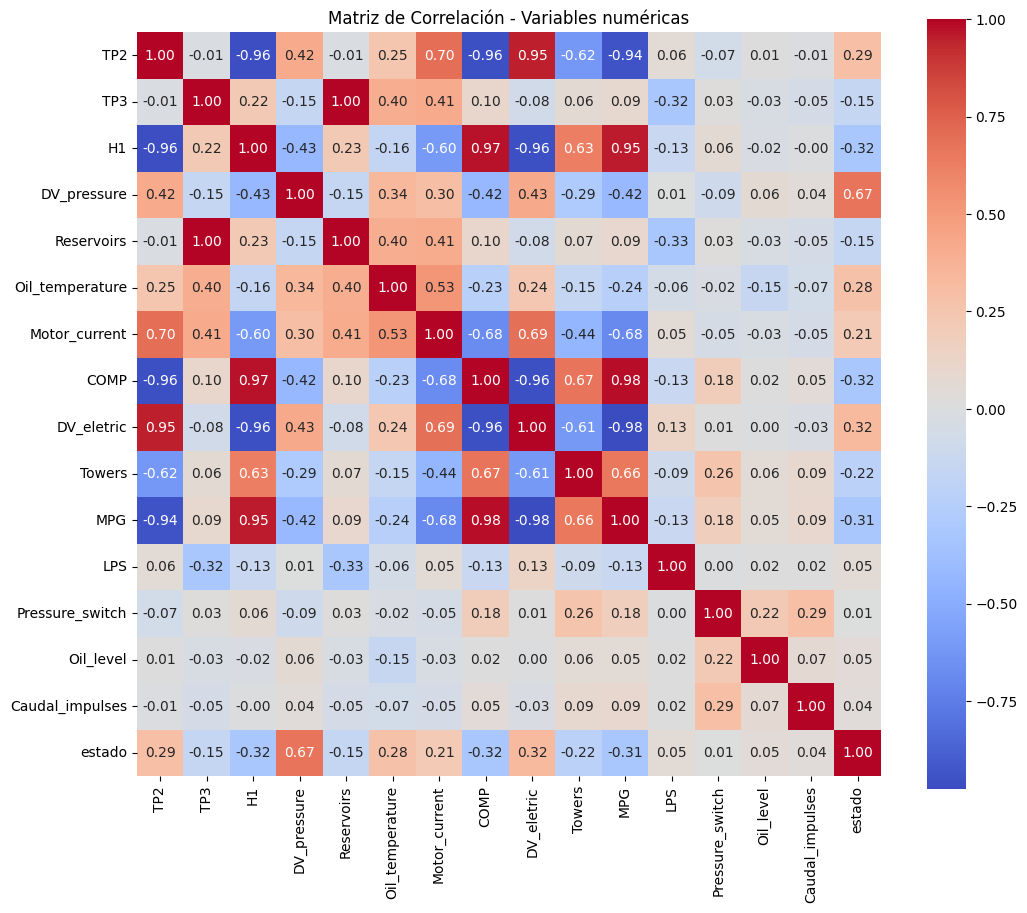

In [ ]:
# Correlación de Pearson
#La correlación de Pearson mide la fuerza y dirección de la relación lineal entre dos variables numéricas
df = df.drop(columns=['Unnamed: 0'])
correlacion = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación - Variables numéricas")
plt.show()


In [ ]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,estado
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


## VARIABLES

## Ventanas

SELECCIÓN DE CARACTERISTICAS CON RANDOM FOREST


Variables con importancia mayor al 0.05 (5%) suelen ser relevantes.
Variables con más de 0.10 (10%) tienen un impacto significativo en el modelo.
Variables con importancias muy bajas (cerca de 0) deberían ser evaluadas para posibles eliminaciones, ya que podrían ser ruido para el modelo.

**Valores de variables por encima del 0.05:**

DV_pressure = 0.30

Oil_temperature = 0.26

Reservoirs = 0.11

TP3 = 0.10

TP2 = 0.07

H1 = 0.06

no correr random forrest rompe lo q sigue despues

1.   Elemento de lista
2.   Elemento de lista



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

def variables_importantes_rf(df, target='estado'):
    """
    Entrena un Random Forest y devuelve la importancia de las variables.
    """
    df_modelo = df.select_dtypes(include='number').drop(columns=['Unnamed: 0'], errors='ignore')
    X = df_modelo.drop(columns=[target])
    y = df_modelo[target]

    modelo = RandomForestClassifier(n_estimators=100, random_state=42)
    modelo.fit(X, y)

    # Obtener la importancia de las variables
    importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Graficar la importancia de las variables
    plt.figure(figsize=(10, 6))
    importancias.head(15).plot(kind='bar')
    plt.title('Importancia de variables (Random Forest)')
    plt.ylabel('Importancia')
    plt.tight_layout()
    plt.show()

    # Guardar las importancias en una lista
    importancias_lista = importancias.tolist()

    return importancias, importancias_lista
dfrandom=df
# Llamar a la función y almacenar tanto el DataFrame como la lista
importancias_rf, importancias_lista = variables_importantes_rf(dfrandom)

# Imprimir la lista de importancias
print(importancias_lista)


KeyboardInterrupt: 

# SUBSAMPLING Y ARMADO DE MODELO PARA POC

El proceso será el siguiente: crear un intervalo de datos previo a la falla de igual tamaño que la falla. Haciendo eso en 2 fallas vamos a tener los datos para entrenar el modelo para la POC. De manera tal que no tengamos que hacer el subsampling total del dataset pero podamos utilizar una muestra balanceada en ambas clases.


In [ ]:
def subsampling(df, intervalo_falla):
    """
    Realiza un submuestreo de datos igual al tamaño de la falla, pero usando los datos previos a la falla.
    Recibe un intervalo de falla (inicio, fin) y devuelve un DataFrame con el mismo tamaño de datos
    antes de la falla.

    Parámetros:
    - df: DataFrame original con el que se hace el submuestreo.
    - intervalo_falla: Tupla con las fechas de inicio y fin de la falla.

    Retorna:
    - Un DataFrame con los datos previos a la falla con la misma cantidad que los de la falla.
    """
    # Convertir las fechas de inicio y fin a datetime
    inicio, fin = pd.to_datetime(intervalo_falla[0]), pd.to_datetime(intervalo_falla[1])

    # Obtener los datos de la falla
    datos_falla = df[(df["timestamp"] >= inicio) & (df["timestamp"] <= fin)].copy()

    # Determinar cuántos puntos de datos hay en la falla (cuántos registros)
    num_falla = len(datos_falla)

    # Encontrar el índice de inicio más cercano en el DataFrame
    idx_inicio = df[df["timestamp"] >= inicio].index[0]  # Esto garantiza que obtienes el primer índice >= inicio

    # Tomar los mismos 'num_falla' puntos antes de la falla
    idx_pre_falla = idx_inicio - num_falla

    # Obtener los datos previos (usando los índices calculados)
    datos_pre_falla = df.iloc[idx_pre_falla:idx_inicio].copy()

    return datos_pre_falla, datos_falla

# Ejemplo de uso con las fallas proporcionadas
falla1 = ("2020-04-18 00:00:00", "2020-04-18 23:59:00")
datospoc1_pre, datospoc1_falla = subsampling(df, falla1)

falla2 = ("2020-05-29 23:30:00", "2020-05-30 06:00:00")
datospoc2_pre, datospoc2_falla = subsampling(df, falla2)

# Falla 3: ("2020-06-05 10:00:00", "2020-06-07 14:30:00")
falla3 = ("2020-06-05 10:00:00", "2020-06-07 14:30:00")
datospoc3_pre, datospoc3_falla = subsampling(df, falla3)

# Falla 4: ("2020-07-15 14:30:00", "2020-07-15 19:00:00")
falla4 = ("2020-07-15 14:30:00", "2020-07-15 19:00:00")
datospoc4_pre, datospoc4_falla = subsampling(df, falla4)

# Mostrar los resultados
print(f"Datos previos a la falla 1: {len(datospoc1_pre)} puntos")
print(f"Datos durante la falla 1: {len(datospoc1_falla)} puntos")
print(f"Datos previos a la falla 2: {len(datospoc2_pre)} puntos")
print(f"Datos durante la falla 2: {len(datospoc2_falla)} puntos")
df_poc=pd.concat([datospoc1_pre, datospoc1_falla,datospoc2_pre,datospoc2_falla])
print(df_poc)

Datos previos a la falla 1: 8657 puntos
Datos durante la falla 1: 8657 puntos
Datos previos a la falla 2: 2360 puntos
Datos durante la falla 2: 2360 puntos
                 timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
553907 2020-04-16 17:30:51 -0.012  9.368  9.356       -0.022       9.368   
553908 2020-04-16 17:31:00 -0.012  9.360  9.348       -0.022       9.358   
553909 2020-04-16 17:31:10 -0.014  9.352  9.338       -0.024       9.350   
553910 2020-04-16 17:31:20 -0.014  9.342  9.330       -0.024       9.340   
553911 2020-04-16 17:31:30 -0.014  9.332  9.322       -0.024       9.332   
...                    ...    ...    ...    ...          ...         ...   
843095 2020-05-30 05:59:15  0.000  9.766  9.750       -0.012       9.774   
843096 2020-05-30 05:59:25  0.000  9.748  9.730       -0.010       9.754   
843097 2020-05-30 05:59:35  0.000  9.728  9.708       -0.010       9.732   
843098 2020-05-30 05:59:44  0.000  9.704  9.686       -0.010       9.708   
843099 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Variables que vas a usar para entrenar el modelo
variables_seleccionadas = ["DV_pressure", "Oil_temperature", "Reservoirs", "TP3", "TP2", "H1"]

# Dividir los datos en las variables de entrada (X) y el target (y)
X = df_poc[variables_seleccionadas]  # Ahora seleccionamos solo las variables que elegiste
y = df_poc['estado']  # El target 'estado'

# Dividir los datos en entrenamiento (80%) y prueba (20%) de forma estratificada (manteniendo la proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar la distribución de clases en el conjunto de entrenamiento y prueba
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts())


Distribución en el conjunto de entrenamiento:
estado
1    8814
0    8813
Name: count, dtype: int64

Distribución en el conjunto de prueba:
estado
0    2204
1    2203
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definir el modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

# Definir el espacio de parámetros a explorar
parametros = {
    'n_estimators': [100, 200, 300, 400, 500],  # Número de árboles
    'max_depth': [None, 10, 20, 30, 40, 50],    # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10, 20],         # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 8],            # Número mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2', None],      # Número de características a considerar para dividir
    'bootstrap': [True, False]                    # Si se usa bootstrap para crear los árboles
}


# Realizar RandomizedSearchCV con 100 iteraciones y 5 particiones para cross-validation
random_search = RandomizedSearchCV(estimator=modelo_rf, param_distributions=parametros,
                                   n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Entrenar el modelo con los parámetros óptimos encontrados por RandomizedSearchCV
# X train y Y test (estado) fueron estimados en la celda anterior
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", random_search.best_params_)

# Usar el mejor modelo encontrado para predecir
modelo_rf_optimo = random_search.best_estimator_

# Evaluar el modelo
y_pred = modelo_rf_optimo.predict(X_test)

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2204
           1       1.00      0.99      1.00      2203

    accuracy                           1.00      4407
   macro avg       1.00      1.00      1.00      4407
weighted avg       1.00      1.00      1.00      4407



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definir el modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

# Definir el espacio de parámetros a explorar
parametros = {
    'n_estimators': [200],  # Número de árboles
    'max_depth': [10],    # Profundidad máxima de los árboles
    'min_samples_split': [2],         # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 8],            # Número mínimo de muestras por hoja
    'max_features': ['log2'],      # Número de características a considerar para dividir
    'bootstrap': [True]                    # Si se usa bootstrap para crear los árboles
}


# Realizar RandomizedSearchCV con 100 iteraciones y 5 particiones para cross-validation
random_search = RandomizedSearchCV(estimator=modelo_rf, param_distributions=parametros,
                                   n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Entrenar el modelo con los parámetros óptimos encontrados por RandomizedSearchCV
# X train y Y test (estado) fueron estimados en la celda anterior
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", random_search.best_params_)

# Usar el mejor modelo encontrado para predecir
modelo_rf_optimo = random_search.best_estimator_

# Evaluar el modelo
y_pred = modelo_rf_optimo.predict(X_test)

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2204
           1       1.00      0.99      1.00      2203

    accuracy                           1.00      4407
   macro avg       1.00      1.00      1.00      4407
weighted avg       1.00      1.00      1.00      4407



In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(random_search.best_estimator_, 'modelo_rf_optimo.pkl')

# Cargar el modelo previamente guardado
modelo_rf_optimo = joblib.load('modelo_rf_optimo.pkl')


In [ ]:
def predecir_en_ventanas(df, modelo_rf_optimo, ventana_tamaño_minutos=20, horizonte_falla_minutos=60):
    """
    Aplica un modelo de Random Forest a datos en ventanas deslizantes.
    Para cada ventana de 20 minutos, predice si habrá una falla en la siguiente hora.

    Parámetros:
    - df: DataFrame con los datos históricos, con una columna 'timestamp' y otras variables de entrada.
    - modelo_rf_optimo: el modelo Random Forest entrenado.
    - ventana_tamaño_minutos: tamaño de la ventana deslizante (en minutos).
    - horizonte_falla_minutos: horizonte de la predicción (en minutos) para detectar la falla.

    Retorna:
    - DataFrame con las predicciones de cada ventana.
    """

    # Asegurarse de que la columna 'timestamp' esté en formato datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Lista para guardar las predicciones
    predicciones = []

    # Convertir el tamaño de la ventana a timedelta
    ventana_tamaño = pd.Timedelta(minutes=ventana_tamaño_minutos)
    horizonte_falla = pd.Timedelta(minutes=horizonte_falla_minutos)

    # Deslizar la ventana por todo el DataFrame basado en la columna 'timestamp'
    for i in range(len(df) - 1):  # Recorremos por las filas
        inicio = df['timestamp'].iloc[i]  # Inicio de la ventana (timestamp de la fila actual)
        fin = inicio + ventana_tamaño  # Fin de la ventana: sumar un 'Timedelta' a 'inicio'

        # Si el fin de la ventana excede el último timestamp disponible, terminamos el bucle
        if fin > df['timestamp'].iloc[-1]:  # Si la ventana excede los datos disponibles, salimos del bucle
            break

        # Extraer la ventana de 20 minutos (de 'inicio' a 'fin')
        ventana = df[(df['timestamp'] >= inicio) & (df['timestamp'] < fin)]

        # Variables de entrada (X) son las columnas de sensores, y el target (y) es 'estado'
        X_ventana = ventana[variables_seleccionadas]  # Asegúrate de tener las variables definidas

        # Predecir la probabilidad de falla en la siguiente hora (horizonte de 60 minutos)
        y_prob = modelo_rf_optimo.predict_proba(X_ventana)

        # Calcular la hora de la falla estimada sumando el horizonte de la predicción al inicio de la ventana
        hora_falla = inicio + horizonte_falla

        # Almacenar la predicción para la ventana actual
        predicciones.append({
            'inicio_ventana': ventana['timestamp'].iloc[0],  # Primer timestamp de la ventana
            'probabilidad_falla': y_prob[-1][1],  # Probabilidad de que sea 'falla'
            'falla_prevista': 'falla' if y_prob[-1][1] > 0.7 else 'no falla',
            'hora_falla_predicha': hora_falla  # Hora estimada de la falla (en el futuro)
        })

    # Crear un DataFrame con las predicciones
    predicciones_df = pd.DataFrame(predicciones)

    return predicciones_df
df_falla4=pd.concat([datospoc4_pre, datospoc4_falla])

# Usar la función para hacer predicciones para la falla 4
predicciones_falla4 = predecir_en_ventanas(df_falla4, modelo_rf_optimo)

# Mostrar las primeras predicciones
print(predicciones_falla4.head())

       inicio_ventana  probabilidad_falla falla_prevista hora_falla_predicha
0 2020-07-15 10:02:03               0.425       no falla 2020-07-15 11:02:03
1 2020-07-15 10:02:13               0.460       no falla 2020-07-15 11:02:13
2 2020-07-15 10:02:23               0.435       no falla 2020-07-15 11:02:23
3 2020-07-15 10:02:32               0.435       no falla 2020-07-15 11:02:32
4 2020-07-15 10:02:42               0.445       no falla 2020-07-15 11:02:42


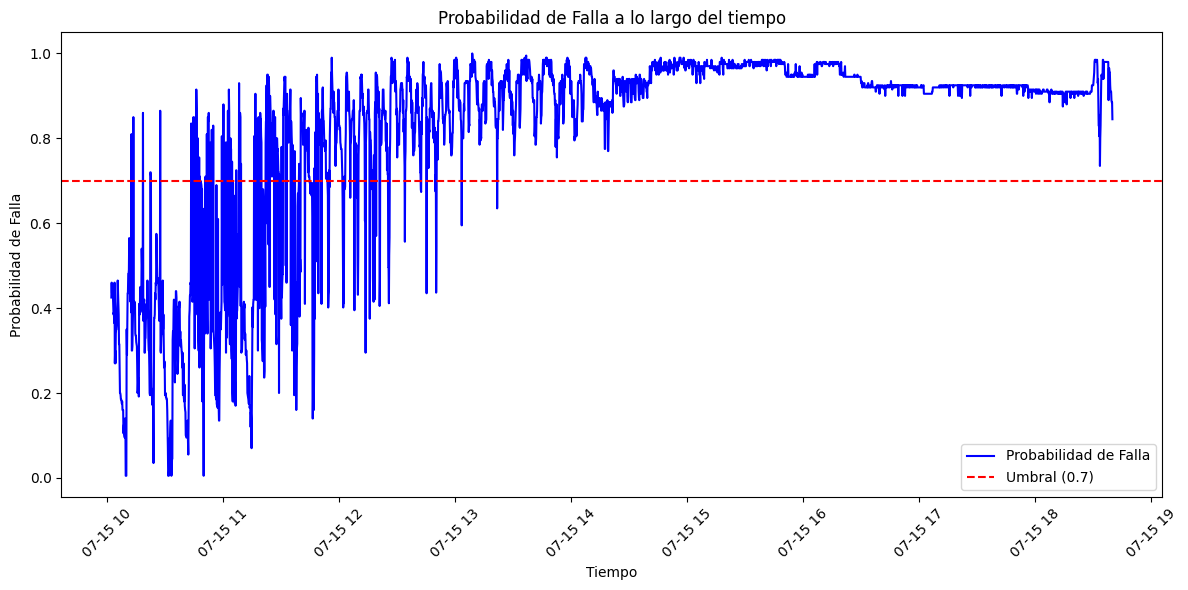

('2020-07-15 014:30:0', '2020-07-15 19:00:00')

In [ ]:
import matplotlib.pyplot as plt

# Graficar la probabilidad de falla a lo largo del tiempo
plt.figure(figsize=(12, 6))

# Graficamos la probabilidad de falla
plt.plot(predicciones_falla4['inicio_ventana'], predicciones_falla4['probabilidad_falla'], label='Probabilidad de Falla', color='b')

# Añadir una línea de umbral de 0.7
plt.axhline(y=0.7, color='r', linestyle='--', label='Umbral (0.7)')

# Mejorar la visualización
plt.title('Probabilidad de Falla a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de Falla')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

("2020-07-15 014:30:0", "2020-07-15 19:00:00")

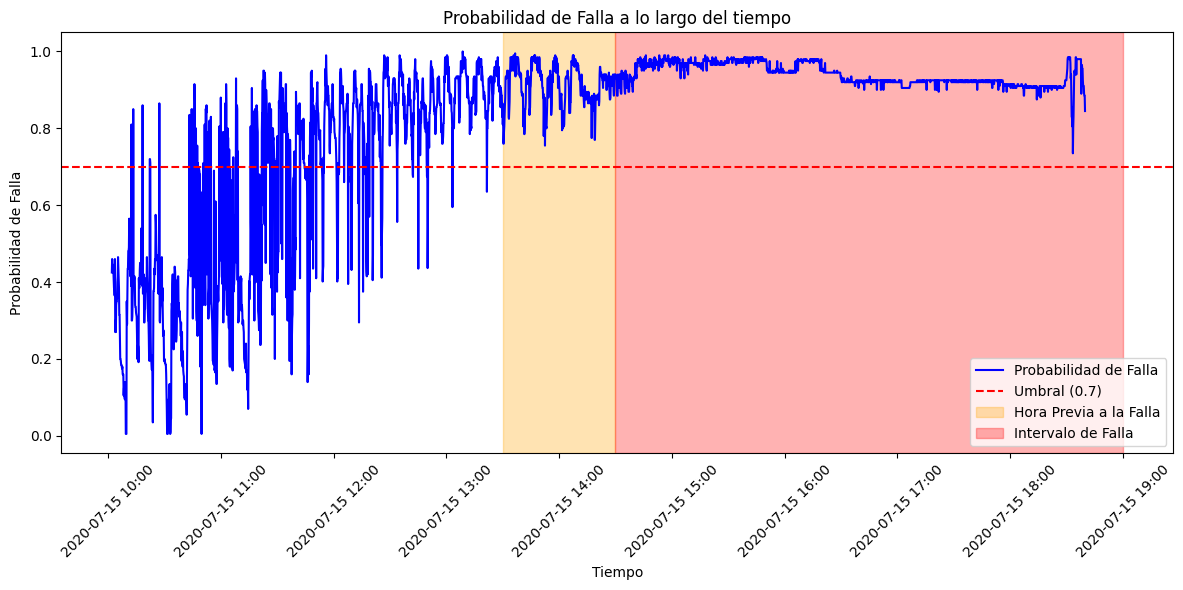

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Graficar la probabilidad de falla a lo largo del tiempo
plt.figure(figsize=(12, 6))

# Graficamos la probabilidad de falla
plt.plot(predicciones_falla4['inicio_ventana'], predicciones_falla4['probabilidad_falla'], label='Probabilidad de Falla', color='b')

# Añadir una línea de umbral de 0.7
plt.axhline(y=0.7, color='r', linestyle='--', label='Umbral (0.7)')

# Añadir los intervalos de tiempo (previo y falla) con colores
# Definir los intervalos de tiempo para falla y previo (convertir las fechas a datetime)
falla_inicio = pd.to_datetime("2020-07-15 14:30:00")
falla_fin = pd.to_datetime("2020-07-15 19:00:00")
previo_inicio = falla_inicio - pd.Timedelta(hours=1)
previo_fin = falla_inicio

# Resaltar el intervalo previo a la falla en naranja
plt.axvspan(previo_inicio, previo_fin, color='orange', alpha=0.3, label='Hora Previa a la Falla')

# Resaltar el intervalo de la falla en rojo
plt.axvspan(falla_inicio, falla_fin, color='red', alpha=0.3, label='Intervalo de Falla')

# Mejorar la visualización
plt.title('Probabilidad de Falla a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de Falla')
plt.xticks(rotation=45)
plt.legend()

# Asegurarse de que el formato de las fechas sea adecuado en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Ajustar el diseño para que no se corten los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
def predecir_en_ventanas(df, modelo_rf_optimo, ventana_tamaño_minutos=20, horizonte_falla_minutos=60):
    """
    Aplica un modelo de Random Forest a datos en ventanas deslizantes.
    Para cada ventana de 20 minutos, predice si habrá una falla en la siguiente hora.

    Parámetros:
    - df: DataFrame con los datos históricos, con una columna 'timestamp' y otras variables de entrada.
    - modelo_rf_optimo: el modelo Random Forest entrenado.
    - ventana_tamaño_minutos: tamaño de la ventana deslizante (en minutos).
    - horizonte_falla_minutos: horizonte de la predicción (en minutos) para detectar la falla.

    Retorna:
    - DataFrame con las predicciones de cada ventana.
    """

    # Asegurarse de que la columna 'timestamp' esté en formato datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Lista para guardar las predicciones
    predicciones = []

    # Convertir el tamaño de la ventana a timedelta
    ventana_tamaño = pd.Timedelta(minutes=ventana_tamaño_minutos)
    horizonte_falla = pd.Timedelta(minutes=horizonte_falla_minutos)

    # Deslizar la ventana por todo el DataFrame basado en la columna 'timestamp'
    for i in range(len(df) - 1):  # Recorremos por las filas
        inicio = df['timestamp'].iloc[i]  # Inicio de la ventana (timestamp de la fila actual)
        fin = inicio + ventana_tamaño  # Fin de la ventana: sumar un 'Timedelta' a 'inicio'

        # Si el fin de la ventana excede el último timestamp disponible, terminamos el bucle
        if fin > df['timestamp'].iloc[-1]:  # Si la ventana excede los datos disponibles, salimos del bucle
            break

        # Extraer la ventana de 20 minutos (de 'inicio' a 'fin')
        ventana = df[(df['timestamp'] >= inicio) & (df['timestamp'] < fin)]

        # Variables de entrada (X) son las columnas de sensores, y el target (y) es 'estado'
        X_ventana = ventana[variables_seleccionadas]  # Asegúrate de tener las variables definidas

        # Predecir la probabilidad de falla en la siguiente hora (horizonte de 60 minutos)
        y_prob = modelo_rf_optimo.predict_proba(X_ventana)

        # Calcular la hora de la falla estimada sumando el horizonte de la predicción al inicio de la ventana
        hora_falla = inicio + horizonte_falla

        # Almacenar la predicción para la ventana actual
        predicciones.append({
            'inicio_ventana': ventana['timestamp'].iloc[0],  # Primer timestamp de la ventana
            'probabilidad_falla': y_prob[-1][1],  # Probabilidad de que sea 'falla'
            'falla_prevista': 'falla' if y_prob[-1][1] > 0.7 else 'no falla',
            'hora_falla_predicha': hora_falla  # Hora estimada de la falla (en el futuro)
        })

    # Crear un DataFrame con las predicciones
    predicciones_df = pd.DataFrame(predicciones)

    return predicciones_df
df_falla4=pd.concat([datospoc4_pre, datospoc4_falla])

# Usar la función para hacer predicciones para la falla 4
predicciones_falla4 = predecir_en_ventanas(datospoc4_pre, modelo_rf_optimo)

# Mostrar las primeras predicciones
print(predicciones_falla4.head())

       inicio_ventana  probabilidad_falla falla_prevista hora_falla_predicha
0 2020-07-15 10:02:03               0.425       no falla 2020-07-15 11:02:03
1 2020-07-15 10:02:13               0.460       no falla 2020-07-15 11:02:13
2 2020-07-15 10:02:23               0.435       no falla 2020-07-15 11:02:23
3 2020-07-15 10:02:32               0.435       no falla 2020-07-15 11:02:32
4 2020-07-15 10:02:42               0.445       no falla 2020-07-15 11:02:42


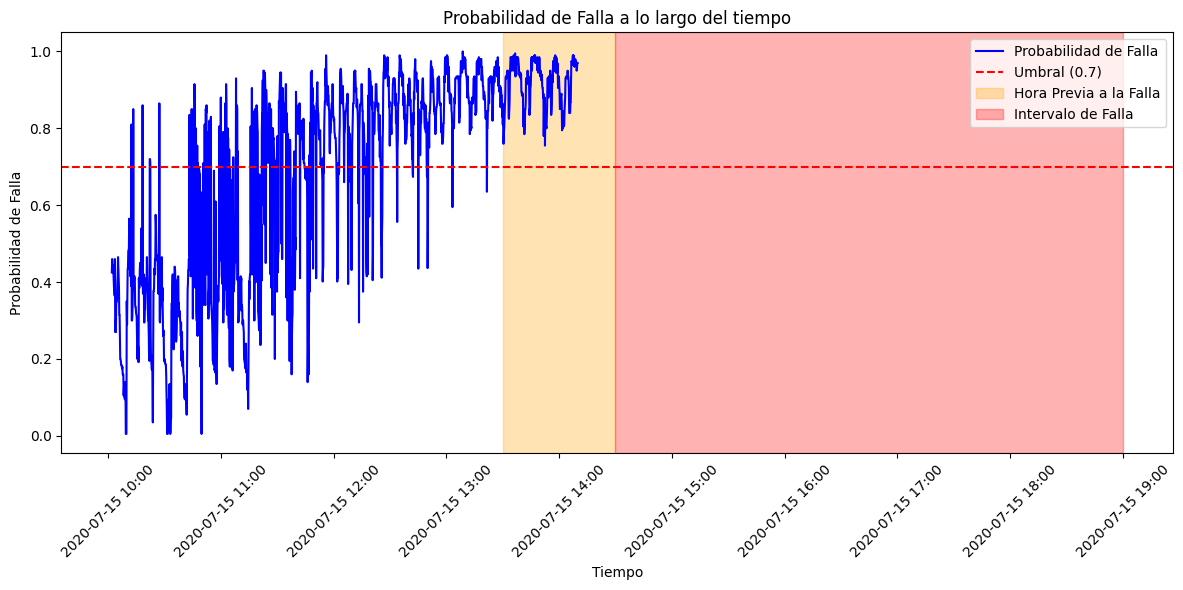

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Graficar la probabilidad de falla a lo largo del tiempo
plt.figure(figsize=(12, 6))

# Graficamos la probabilidad de falla
plt.plot(predicciones_falla4['inicio_ventana'], predicciones_falla4['probabilidad_falla'], label='Probabilidad de Falla', color='b')

# Añadir una línea de umbral de 0.7
plt.axhline(y=0.7, color='r', linestyle='--', label='Umbral (0.7)')

# Añadir los intervalos de tiempo (previo y falla) con colores
# Definir los intervalos de tiempo para falla y previo (convertir las fechas a datetime)
falla_inicio = pd.to_datetime("2020-07-15 14:30:00")
falla_fin = pd.to_datetime("2020-07-15 19:00:00")
previo_inicio = falla_inicio - pd.Timedelta(hours=1)
previo_fin = falla_inicio

# Resaltar el intervalo previo a la falla en naranja
plt.axvspan(previo_inicio, previo_fin, color='orange', alpha=0.3, label='Hora Previa a la Falla')

# Resaltar el intervalo de la falla en rojo
plt.axvspan(falla_inicio, falla_fin, color='red', alpha=0.3, label='Intervalo de Falla')

# Mejorar la visualización
plt.title('Probabilidad de Falla a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de Falla')
plt.xticks(rotation=45)
plt.legend()

# Asegurarse de que el formato de las fechas sea adecuado en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Ajustar el diseño para que no se corten los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def comparar_predicciones_con_realidad(predicciones_df, df_real, horizonte_falla_minutos=60):
    """
    Compara las predicciones de fallo con las etiquetas reales.

    Parámetros:
    - predicciones_df: DataFrame con las predicciones del modelo (contiene 'inicio_ventana', 'probabilidad_falla', 'falla_prevista', etc.).
    - df_real: DataFrame con las etiquetas reales de fallo (debe tener la columna 'timestamp' y 'estado').
    - horizonte_falla_minutos: Horizonte de la predicción, que define hasta cuándo se considera la falla real.

    Retorna:
    - classification_report: Reporte con métricas de precisión, recall y f1-score.
    - confusion_matrix: Matriz de confusión para visualizar la performance del modelo.
    """

    # Asegurarse de que las columnas 'timestamp' en ambos DataFrames estén en formato datetime
    df_real['timestamp'] = pd.to_datetime(df_real['timestamp'])
    predicciones_df['inicio_ventana'] = pd.to_datetime(predicciones_df['inicio_ventana'])

    # Crear una lista para almacenar las etiquetas reales (y) y las predicciones (y_pred)
    y_true = []
    y_pred = []

    for _, pred in predicciones_df.iterrows():
        # Obtener el tiempo de inicio de la ventana
        inicio_ventana = pred['inicio_ventana']

        # Establecer el rango de tiempo de la predicción (falla futura en el horizonte de 60 minutos)
        fin_futura = inicio_ventana + pd.Timedelta(minutes=horizonte_falla_minutos)

        # Obtener las etiquetas reales de esa ventana (el estado dentro de ese período de tiempo)
        ventana_real = df_real[(df_real['timestamp'] >= inicio_ventana) & (df_real['timestamp'] <= fin_futura)]

        # Si encontramos que hay una falla en el rango de tiempo, marcamos como 1 (falla), sino 0 (no falla)
        estado_real = ventana_real['estado'].max()  # Si hay una falla en esa ventana, max() devolverá 1

        # Añadir la etiqueta real a la lista
        y_true.append(estado_real)

        # La predicción del modelo, si la probabilidad de falla es mayor a 0.5
        y_pred.append(1 if pred['probabilidad_falla'] > 0.5 else 0)

    # Generar el reporte de clasificación
    report = classification_report(y_true, y_pred)
    print("Reporte de clasificación:")
    print(report)

    # Generar la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    print("\nMatriz de confusión:")
    print(cm)

    return report, cm

# Comparar las predicciones de la falla 4 con los datos reales
report, cm = comparar_predicciones_con_realidad(predicciones_falla4, df_falla4)


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53      1259
           1       0.23      1.00      0.38       242

    accuracy                           0.47      1501
   macro avg       0.62      0.68      0.45      1501
weighted avg       0.88      0.47      0.51      1501


Matriz de confusión:
[[456 803]
 [  0 242]]


# ARMADO DE MODELO PARA EL MVP / PRODUCTO FINAL
La idea es preparar el modelo de cara al ensamble del producto final. El objetivo va a ser dividir los datos en train y test, entrenar el modelo y evaluar métricas del mismo.

Para dividir los datos en entrenamiento y prueba vamos a hacer un split temporal para evitar data leakage. Vamos a utilizar la 4ta falla para hacer las pruebas del model.

Estos modelos dieron TODOS MAL -- NO VAN A A LA ENTREGA FINAL

In [ ]:
import numpy as np

# Cuántas filas adelante equivale a 30 min(si cada fila = 10 segundos)
pasos = int((30 * 60) / 10)  # 180 pasos

# Crear una columna 'target' por posición
def crear_target_por_indice(df, pasos):
    target = []

    for i in range(len(df)):
        if i + pasos >= len(df):
            target.append(np.nan)
        else:
            target.append(df.iloc[i + pasos]["estado"])

    return target

# Aplicar
df["target"] = crear_target_por_indice(df, pasos)

print(df["target"].value_counts(dropna=False))



target
0.0    1486814
1.0      29954
NaN        180
Name: count, dtype: int64


In [ ]:
def split_temporal_con_falla(df, timestamp_col, ultima_falla_str, proporcion_train=0.7):
    """
    Divide un DataFrame temporal en entrenamiento y test asegurando que la última falla quede en test.

    Parámetros:
        df (pd.DataFrame): el DataFrame original.
        timestamp_col (str): nombre de la columna con timestamps.
        ultima_falla_str (str): timestamp de la última falla (ej. '2020-07-15 14:30:00').
        proporcion_train (float): proporción del conjunto de entrenamiento (por defecto 0.7).

    Retorna:
        df_train, df_test (pd.DataFrame, pd.DataFrame)
    """
    df = df.sort_values(timestamp_col)
    ultima_falla = pd.to_datetime(ultima_falla_str)

    # Timestamp correspondiente al corte del % de entrenamiento
    corte_idx = int(len(df) * proporcion_train)
    timestamp_corte = df.iloc[corte_idx][timestamp_col]

    # Si la última falla no cae en test, ajustar corte para que quede incluida
    if ultima_falla <= timestamp_corte:
        timestamp_corte = df[df[timestamp_col] < ultima_falla].iloc[-1][timestamp_col]

    df_train = df[df[timestamp_col] <= timestamp_corte]
    df_test = df[df[timestamp_col] > timestamp_corte]

    return df_train, df_test

df_train, df_test = split_temporal_con_falla(df, "timestamp", "2020-07-15 14:30:00")


print(len(df_train))
print(len(df_test))

print("Valores de target en df_train", df_train["target"].value_counts(dropna=False))
print("Valores de target en df_test", df_test["target"].value_counts(dropna=False))
# Eliminamos los NaN que son 360, sería una hora del dataset. No es estadísticamente significativo, representa menos del 1%.
df_test = df_test.dropna(subset=["target"])



1061864
455084
Valores de target en df_train target
0.0    1033532
1.0      28332
Name: count, dtype: int64
Valores de target en df_test target
0.0    453282
1.0      1622
NaN       180
Name: count, dtype: int64


Ahora se va a entrenar el modelo. Como en los datos de train solamente tenemos 2% de la clase 1, quizás tengamos que balancear esas clases. Primero vamos a entrenar el modelo con esa distribución. Luego vamos a analizar las métricas propias del modelo. En caso de que alcancemos

Reporte de clasificación:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    453282
         1.0       0.00      0.00      0.00      1622

    accuracy                           1.00    454904
   macro avg       0.50      0.50      0.50    454904
weighted avg       0.99      1.00      0.99    454904



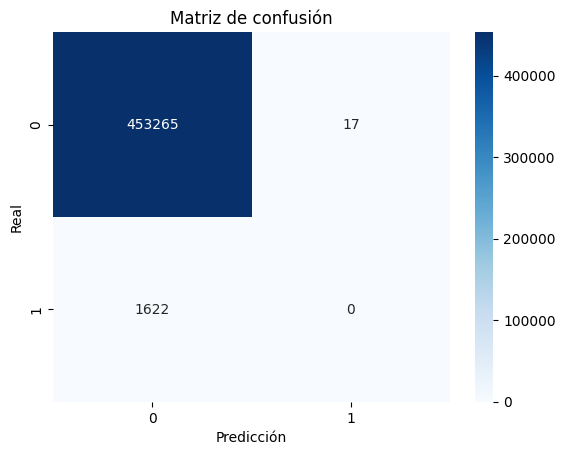

In [ ]:
# Variables seleccionadas de la POC
variables_seleccionadas = ["DV_pressure", "Oil_temperature", "Reservoirs", "TP3", "TP2", "H1"]

# Entradas y salidas
X_train = df_train[variables_seleccionadas]
y_train = df_train["target"]

X_test = df_test[variables_seleccionadas]
y_test = df_test["target"]

# Entrenamiento del modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred = modelo_rf.predict(X_test)

# Reporte de métricas
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


Random Forest con class_weight='balanced'

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    453102
         1.0       0.00      0.00      0.00      1622

    accuracy                           1.00    454724
   macro avg       0.50      0.50      0.50    454724
weighted avg       0.99      1.00      0.99    454724



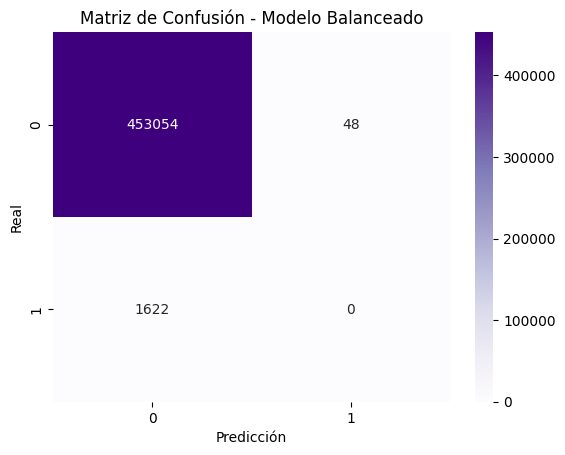

In [ ]:
modelo_rf_balanceado = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"  # <- clave para que le preste atención a clase 1
)
modelo_rf_balanceado.fit(X_train, y_train)

y_pred_bal = modelo_rf_balanceado.predict(X_test)

# Métricas
print("Random Forest con class_weight='balanced'\n")
print(classification_report(y_test, y_pred_bal))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_bal)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Modelo Balanceado")
plt.show()


Como se observa en ambas matrices de confusión, el modelo es incapaz de identificar correctamente los casos de falla (clase 1). Esto se debe al fuerte desbalance en la distribución de clases, donde los eventos de falla son significativamente menos frecuentes que los normales (clase 0). Esta diferencia provoca que el modelo tienda a predecir únicamente la clase mayoritaria.

SUBSAMPLING

1.   Random undersampling
2.   Cluster centroids

Toma todas las muestras de la clase minoritaria (1)

Luego selecciona al azar la misma cantidad de muestras de la clase mayoritaria (0)
Balanceás las clases de forma rápida y entendible.

Fácil de implementar.

¿Cuándo no conviene?
Si la clase mayoritaria tiene mucha variabilidad → podrías eliminar info útil.

2

¿Qué hace?
Aplica clustering (ej: K-Means) a la clase mayoritaria y reemplaza los datos por los centroides de esos clusters.

¿Por qué sirve?
Reduce la clase mayoritaria sin perder su estructura general.

¿Es explicable?
Sí: “usamos puntos representativos para mantener la diversidad sin usar todos los datos”.

In [ ]:
from sklearn.utils import resample

# Separar clases
df_majority = df_train[df_train["target"] == 0]
df_minority = df_train[df_train["target"] == 1]

# Submuestreo aleatorio de la clase mayoritaria
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Concatenar y mezclar
df_train_random = pd.concat([df_majority_downsampled, df_minority]).sample(frac=1, random_state=42)
print("Valores de target en df_test", df_train_random["target"].value_counts(dropna=False))


Valores de target en df_test target
1.0    28332
0.0    28332
Name: count, dtype: int64


Trabajamos el modelo over sampleado, ya que el subsampleo no sirvió antes

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Variables predictoras
variables = ["DV_pressure", "Oil_temperature", "Reservoirs", "TP3", "TP2", "H1"]
X_train = df_train[variables]
y_train = df_train["target"]

# Aplicar Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Reconstruir DataFrame balanceado
df_train_oversampled = pd.DataFrame(X_ros, columns=variables)
df_train_oversampled["target"] = y_ros

# Verificar nuevo balance
print(df_train_oversampled["target"].value_counts())


target
0.0    1033532
1.0    1033532
Name: count, dtype: int64


Random Forest con TODAS las variables numéricas (ajuste intensificado):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    453282
         1.0       0.00      0.00      0.00      1622

    accuracy                           1.00    454904
   macro avg       0.50      0.50      0.50    454904
weighted avg       0.99      1.00      0.99    454904



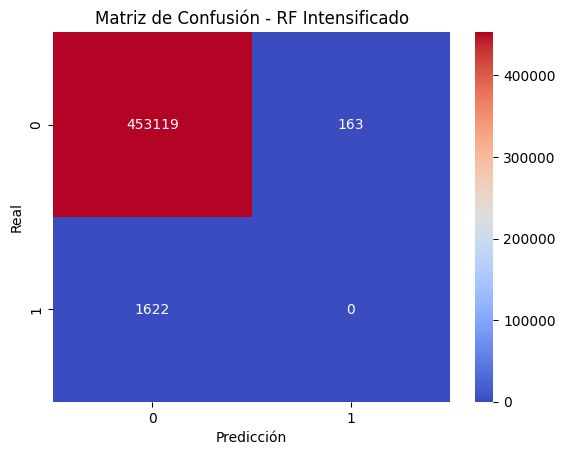

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 👉 Ampliar el muestreo del dataset oversampleado
df_sampled = df_train_oversampled.sample(n=200_000, random_state=42)

# 👉 Todas las variables numéricas excepto estado y target
variables_todas = df_sampled.select_dtypes(include='number').drop(columns=["estado", "target"], errors='ignore').columns.tolist()

X_train_full = df_sampled[variables_todas]
y_train_full = df_sampled["target"]

X_test_full = df_test[variables_todas]
y_test_full = df_test["target"]

# 👉 Modelo más potente pero aún razonable
modelo_rf_full = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=3,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

# Entrenar
modelo_rf_full.fit(X_train_full, y_train_full)

# Predecir
y_pred_full = modelo_rf_full.predict(X_test_full)

# Evaluación
print("Random Forest con TODAS las variables numéricas (ajuste intensificado):\n")
print(classification_report(y_test_full, y_pred_full))

cm = confusion_matrix(y_test_full, y_pred_full)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - RF Intensificado")
plt.show()




# INTENTAMOS MODELAR CON MENOS TIEMPO A VER SI MEJORAN LAS METRICAS


In [ ]:
import numpy as np

# Cuántas filas adelante equivale a 10 minutos (cada fila = 10 segundos)
pasos = int((10 * 60) / 10)  # 60 pasos

# Crear una columna 'target' por posición
def crear_target_por_indice(df, pasos):
    target = []
    for i in range(len(df)):
        if i + pasos >= len(df):
            target.append(np.nan)
        else:
            target.append(df.iloc[i + pasos]["estado"])
    return target

# Aplicar y guardar en un nuevo DataFrame
df["target"] = crear_target_por_indice(df, pasos)
df_10min = df.copy()

# Verificar distribución de valores
print(df_10min["target"].value_counts(dropna=False))


KeyboardInterrupt: 

In [ ]:
# Subsampling adaptado a df_10min
def subsampling(df, intervalo_falla):
    inicio, fin = pd.to_datetime(intervalo_falla[0]), pd.to_datetime(intervalo_falla[1])
    datos_falla = df[(df["timestamp"] >= inicio) & (df["timestamp"] <= fin)].copy()
    num_falla = len(datos_falla)
    idx_inicio = df[df["timestamp"] >= inicio].index[0]
    idx_pre_falla = idx_inicio - num_falla
    datos_pre_falla = df.iloc[idx_pre_falla:idx_inicio].copy()
    return datos_pre_falla, datos_falla

# Definir fallas
falla1 = ("2020-04-18 00:00:00", "2020-04-18 23:59:00")
falla2 = ("2020-05-29 23:30:00", "2020-05-30 06:00:00")
falla3 = ("2020-06-05 10:00:00", "2020-06-07 14:30:00")
falla4 = ("2020-07-15 14:30:00", "2020-07-15 19:00:00")

# Submuestras
pre1, f1 = subsampling(df_10min, falla1)
pre2, f2 = subsampling(df_10min, falla2)
pre3, f3 = subsampling(df_10min, falla3)
pre4, f4 = subsampling(df_10min, falla4)


In [ ]:
# Dataset de entrenamiento (falla 1–3)
df_train = pd.concat([pre1, f1, pre2, f2, pre3, f3]).dropna(subset=["target"]).copy()
df_train["target"] = df_train["target"].astype(int)

# Dataset de testeo (falla 4)
df_test = pd.concat([pre4, f4]).dropna(subset=["target"]).copy()
df_test["target"] = df_test["target"].astype(int)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from scipy.stats import randint

# Features y target
features = ["DV_pressure", "Oil_temperature", "Reservoirs", "TP3", "TP2", "H1"]
X_all = df_all_fallas[features]
y_all = df_all_fallas["target"]

# Definición del modelo base
rf_base = RandomForestClassifier(random_state=42)

# Hiperparámetros a probar (rango razonable)
param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

# Usamos F1 para clase 1 como métrica (fallas)
scorer = make_scorer(f1_score, pos_label=1)

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring=scorer,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Entrenar búsqueda
random_search.fit(X_all, y_all)

# Mejor modelo
best_rf = random_search.best_estimator_

# Evaluación sobre los mismos datos (como hacías antes)
y_pred_all = best_rf.predict(X_all)

print("📊 Evaluación del Random Forest optimizado:")
print(classification_report(y_all, y_pred_all, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_all, y_pred_all))

# Mostrar los mejores parámetros
print("🧠 Mejores parámetros encontrados:")
print(random_search.best_params_)




NameError: name 'df_all_fallas' is not defined

aplicamos al dataset entero

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Preparamos los datos reales (sin NaNs en target)
df_real = df_10min.dropna(subset=["target"]).copy()
df_real["target"] = df_real["target"].astype(int)

# 2. Features y target
X_real = df_real[features]
y_real = df_real["target"]

# 3. Predicción con el modelo optimizado
y_pred_real = best_rf.predict(X_real)

# 4. Evaluación
print("📊 Evaluación del Random Forest optimizado sobre df_10min completo:")
print(classification_report(y_real, y_pred_real, digits=4))

print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real, y_pred_real))


NameError: name 'best_rf' is not defined

In [ ]:
# 1. Filtrar solo las filas válidas (donde target no es NaN)
df_real = df_10min.dropna(subset=["target"]).copy()
df_real["target"] = df_real["target"].astype(int)

# 2. Features y target
X_real = df_real[features]
y_real = df_real["target"]

# 3. Predicción con el modelo entrenado sobre todas las fallas
y_pred_real = modelo_full.predict(X_real)

# 4. Evaluación
from sklearn.metrics import classification_report, confusion_matrix

print("📊 Evaluación del modelo entrenado con las 4 fallas aplicado a df_10min completo:")
print(classification_report(y_real, y_pred_real, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real, y_pred_real))


📊 Evaluación del modelo entrenado con las 4 fallas aplicado a df_10min completo:
              precision    recall  f1-score   support

           0     0.9999    0.9855    0.9926   1486934
           1     0.5797    0.9950    0.7326     29954

    accuracy                         0.9857   1516888
   macro avg     0.7898    0.9902    0.8626   1516888
weighted avg     0.9916    0.9857    0.9875   1516888

🧩 Matriz de confusión:
[[1465327   21607]
 [    151   29803]]


TODAVÍA TENEMOS MUCHOS FALSOS POSITIVOS... APLICAMOS UN CAMBIO EN THRESHOLD



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Preparar los datos reales
df_real = df_10min.dropna(subset=["target"]).copy()
df_real["target"] = df_real["target"].astype(int)

X_real = df_real[features]
y_real = df_real["target"]

# 2. Obtener probabilidades
probs = modelo_conservador.predict_proba(X_real)[:, 1]

# 3. Aplicar threshold manual de 0.7
threshold = 0.7
y_pred_custom = (probs >= threshold).astype(int)

# 4. Evaluación
print(f"📊 Evaluación con threshold personalizado = {threshold}:")
print(classification_report(y_real, y_pred_custom, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real, y_pred_custom))


📊 Evaluación con threshold personalizado = 0.7:
              precision    recall  f1-score   support

           0     0.9999    0.9858    0.9928   1486934
           1     0.5854    0.9931    0.7366     29954

    accuracy                         0.9860   1516888
   macro avg     0.7926    0.9894    0.8647   1516888
weighted avg     0.9917    0.9860    0.9877   1516888

🧩 Matriz de confusión:
[[1465864   21070]
 [    208   29746]]


VAMOS A TRABAJAR VARIABLES CONTINUAS PARA UTILIZAR PROMEDIOS MOVILES, VARIANZA MOVIL O LA DESVIACIÓN DEL PROMEDIO MOVIL, PARA VER SI SE PUEDE CAPTAR MEJOR EL COMPORTAMIENTO DE LAS VARIABLES

In [ ]:
df_10min["DV_pressure_ma6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).mean()
df_10min["DV_pressure_diff"] = df_10min["DV_pressure"] - df_10min["DV_pressure_ma6"]
df_10min["DV_pressure_var6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).var()


In [ ]:
# Crear features derivadas de DV_pressure en df_10min
df_10min = df_10min.copy()

df_10min["DV_pressure_ma6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).mean()
df_10min["DV_pressure_diff"] = df_10min["DV_pressure"] - df_10min["DV_pressure_ma6"]
df_10min["DV_pressure_var6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).var()

# Regenerar los bloques para train y test con las nuevas columnnas
pre1, f1 = subsampling(df_10min, falla1)
pre2, f2 = subsampling(df_10min, falla2)
pre3, f3 = subsampling(df_10min, falla3)
pre4, f4 = subsampling(df_10min, falla4)

# Armar dataset completo
df_all_fallas = pd.concat([pre1, f1, pre2, f2, pre3, f3, pre4, f4])
df_all_fallas = df_all_fallas.dropna(subset=["target", "DV_pressure_diff"]).copy()
df_all_fallas["target"] = df_all_fallas["target"].astype(int)

# Usamos DV_pressure_diff en lugar de DV_pressure
features_mod = ["DV_pressure_diff", "Oil_temperature", "Reservoirs", "TP3", "TP2", "H1"]

X_train = df_all_fallas[features_mod]
y_train = df_all_fallas["target"]

# Entrenar modelo conservador
from sklearn.ensemble import RandomForestClassifier

modelo_dv_diff = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=5,
    bootstrap=True,
    max_features="sqrt"
)
modelo_dv_diff.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Preparar datos reales
df_real = df_10min.dropna(subset=["target", "DV_pressure_diff"]).copy()
df_real["target"] = df_real["target"].astype(int)

X_real = df_real[features_mod]
y_real = df_real["target"]

# Predicción
y_pred = modelo_dv_diff.predict(X_real)

# Evaluación
print("📊 Modelo con DV_pressure_diff aplicado a df_10min completo:")
print(classification_report(y_real, y_pred, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real, y_pred))


📊 Modelo con DV_pressure_diff aplicado a df_10min completo:
              precision    recall  f1-score   support

           0     0.9999    0.9835    0.9916   1486934
           1     0.5479    0.9937    0.7063     29954

    accuracy                         0.9837   1516888
   macro avg     0.7739    0.9886    0.8490   1516888
weighted avg     0.9909    0.9837    0.9860   1516888

🧩 Matriz de confusión:
[[1462371   24563]
 [    188   29766]]


In [ ]:
# Variables continuas a analizar
variables_continuas = ["DV_pressure", "TP2", "TP3", "H1", "Reservoirs", "Oil_temperature"]

# Unir bloques
df_pre_falla = pd.concat([pre1, pre2, pre3, pre4])
df_durante_falla = pd.concat([f1, f2, f3, f4])

# Calcular varianza por grupo
print("📊 Varianza por variable (Pre-falla vs Falla):\n")
for var in variables_continuas:
    var_pre = df_pre_falla[var].var()
    var_falla = df_durante_falla[var].var()
    print(f"{var:15s} → Pre-falla: {var_pre:.4f} | Falla: {var_falla:.4f} | Δ: {var_falla - var_pre:.4f}")



📊 Varianza por variable (Pre-falla vs Falla):

DV_pressure     → Pre-falla: 0.0822 | Falla: 0.2699 | Δ: 0.1877
TP2             → Pre-falla: 9.4095 | Falla: 0.9651 | Δ: -8.4444
TP3             → Pre-falla: 0.3657 | Falla: 0.2454 | Δ: -0.1202
H1              → Pre-falla: 9.0658 | Falla: 0.3936 | Δ: -8.6722
Reservoirs      → Pre-falla: 0.3647 | Falla: 0.2454 | Δ: -0.1194
Oil_temperature → Pre-falla: 60.1188 | Falla: 8.5963 | Δ: -51.5225


In [ ]:
# Aseguramos que DV_pressure_var6 esté calculado en df_10min
df_10min["DV_pressure_ma6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).mean()
df_10min["DV_pressure_var6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).var()

# Regenerar los bloques (por si los anteriores no tenían esta columna)
pre1, f1 = subsampling(df_10min, falla1)
pre2, f2 = subsampling(df_10min, falla2)
pre3, f3 = subsampling(df_10min, falla3)
pre4, f4 = subsampling(df_10min, falla4)

# Unir todo
df_all_fallas = pd.concat([pre1, f1, pre2, f2, pre3, f3, pre4, f4])
df_all_fallas = df_all_fallas.dropna(subset=["target", "DV_pressure_var6"]).copy()
df_all_fallas["target"] = df_all_fallas["target"].astype(int)

# Usamos DV_pressure y su varianza
features_mod = ["DV_pressure", "DV_pressure_var6", "Oil_temperature", "Reservoirs", "TP3", "TP2", "H1"]

X_train = df_all_fallas[features_mod]
y_train = df_all_fallas["target"]

# Entrenar modelo conservador
from sklearn.ensemble import RandomForestClassifier

modelo_varianza = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=5,
    bootstrap=True,
    max_features="sqrt"
)
modelo_varianza.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
df_real = df_10min.dropna(subset=["target", "DV_pressure_var6"]).copy()
df_real["target"] = df_real["target"].astype(int)

X_real = df_real[features_mod]
y_real = df_real["target"]

# Predicción
y_pred = modelo_varianza.predict(X_real)

# Evaluación
print("📊 Modelo con DV_pressure + DV_pressure_var6 aplicado a df_10min completo:")
print(classification_report(y_real, y_pred, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real, y_pred))


📊 Modelo con DV_pressure + DV_pressure_var6 aplicado a df_10min completo:
              precision    recall  f1-score   support

           0     0.9999    0.9854    0.9926   1486933
           1     0.5779    0.9939    0.7309     29954

    accuracy                         0.9855   1516887
   macro avg     0.7889    0.9896    0.8617   1516887
weighted avg     0.9915    0.9855    0.9874   1516887

🧩 Matriz de confusión:
[[1465189   21744]
 [    183   29771]]


Vemos la importancia de las variables de este último modeo que es el que mejor precisión tuvo en la clase de FALLA.

In [ ]:
importances = modelo_varianza.feature_importances_
for feat, imp in sorted(zip(features_mod, importances), key=lambda x: -x[1]):
    print(f"{feat}: {imp:.4f}")


DV_pressure: 0.3551
DV_pressure_var6: 0.2186
Oil_temperature: 0.1897
TP2: 0.1308
H1: 0.0448
TP3: 0.0343
Reservoirs: 0.0266


Eliminamos h1, tp3 y reservoirs para eliminar ruido y dejar las variables con más capacidad predictiva.

In [ ]:
features_top = ["DV_pressure", "DV_pressure_var6", "Oil_temperature", "TP2"]


In [ ]:
# Aseguramos que DV_pressure_var6 esté calculado en df_10min
df_10min["DV_pressure_ma6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).mean()
df_10min["DV_pressure_var6"] = df_10min["DV_pressure"].rolling(window=6, min_periods=1).var()

# Regenerar los bloques (por si los anteriores no tenían esta columna)
pre1, f1 = subsampling(df_10min, falla1)
pre2, f2 = subsampling(df_10min, falla2)
pre3, f3 = subsampling(df_10min, falla3)
pre4, f4 = subsampling(df_10min, falla4)

# Unir todo
df_all_fallas = pd.concat([pre1, f1, pre2, f2, pre3, f3, pre4, f4])
df_all_fallas = df_all_fallas.dropna(subset=["target", "DV_pressure_var6"]).copy()
df_all_fallas["target"] = df_all_fallas["target"].astype(int)

# Predecimos con las feature top

X_train = df_all_fallas[features_top]
y_train = df_all_fallas["target"]

# Entrenar modelo conservador
from sklearn.ensemble import RandomForestClassifier

modelo_varianza = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=5,
    bootstrap=True,
    max_features="sqrt"
)
modelo_varianza.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Aseguramos que target y las columnas necesarias estén presentes
df_real = df_10min.dropna(subset=["target", "DV_pressure_var6"]).copy()
df_real["target"] = df_real["target"].astype(int)

# Usar las mismas features que en el entrenamiento
X_real = df_real[features_top]
y_real = df_real["target"]

# Predicción
y_pred = modelo_varianza.predict(X_real)

# Evaluación
print("📊 Modelo con solo las variables más importantes:")
print(classification_report(y_real, y_pred, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real, y_pred))


📊 Modelo con solo las variables más importantes:
              precision    recall  f1-score   support

           0     0.9999    0.9916    0.9957   1486933
           1     0.7054    0.9940    0.8252     29954

    accuracy                         0.9917   1516887
   macro avg     0.8526    0.9928    0.9104   1516887
weighted avg     0.9941    0.9917    0.9924   1516887

🧩 Matriz de confusión:
[[1474497   12436]
 [    181   29773]]


Ahora le ponemos un threshold de 0,6

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Preparar datos
df_real = df_10min.dropna(subset=["target", "DV_pressure_var6"]).copy()
df_real["target"] = df_real["target"].astype(int)

X_real = df_real[features_top]
y_real = df_real["target"]

# Probabilidades
probs = modelo_varianza.predict_proba(X_real)[:, 1]

# Aplicar threshold personalizado
threshold = 0.9
y_pred_custom = (probs >= threshold).astype(int)

# Evaluación
print(f"📊 Evaluación con threshold personalizado = {threshold}:")
print(classification_report(y_real, y_pred_custom, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real, y_pred_custom))


📊 Evaluación con threshold personalizado = 0.9:
              precision    recall  f1-score   support

           0     0.9998    0.9938    0.9968   1486933
           1     0.7622    0.9887    0.8608     29954

    accuracy                         0.9937   1516887
   macro avg     0.8810    0.9912    0.9288   1516887
weighted avg     0.9951    0.9937    0.9941   1516887

🧩 Matriz de confusión:
[[1477692    9241]
 [    339   29615]]


LE QUITAMOS MAS COMPLEJIDAD

# Probamos con 30 minutos previos
El problema estaba en el modelo, no en el tiempo. Finalmente las métricas son malas, por lo que con este dataset no se puede predecir con mucha antelación, por los patrones propios de los datos.

In [ ]:
df_30min = df.copy()

# Cuántas filas adelante equivale a 20 min (si cada fila = 10 segundos)


# Aplicar al DataFrame, como nueva columna


# Ver distribución de valores
print(df_30min["target"].value_counts(dropna=False))



target
0.0    1486934
1.0      29954
NaN         60
Name: count, dtype: int64


In [ ]:
# Función de subsampling adaptada a df_30min
def subsampling(df, intervalo_falla):
    inicio, fin = pd.to_datetime(intervalo_falla[0]), pd.to_datetime(intervalo_falla[1])
    datos_falla = df[(df["timestamp"] >= inicio) & (df["timestamp"] <= fin)].copy()
    num_falla = len(datos_falla)
    idx_inicio = df[df["timestamp"] >= inicio].index[0]
    idx_pre_falla = idx_inicio - num_falla
    datos_pre_falla = df.iloc[idx_pre_falla:idx_inicio].copy()
    return datos_pre_falla, datos_falla

# Definir intervalos de falla
falla1 = ("2020-04-18 00:00:00", "2020-04-18 23:59:00")
falla2 = ("2020-05-29 23:30:00", "2020-05-30 06:00:00")
falla3 = ("2020-06-05 10:00:00", "2020-06-07 14:30:00")
falla4 = ("2020-07-15 14:30:00", "2020-07-15 19:00:00")

# Aplicar a df_30min
pre1_30, f1_30 = subsampling(df_30min, falla1)
pre2_30, f2_30 = subsampling(df_30min, falla2)
pre3_30, f3_30 = subsampling(df_30min, falla3)
pre4_30, f4_30 = subsampling(df_30min, falla4)


Creamos de nuevo la variable derivada de DV PRESSURE y la agregamos al dataset. La ventana para calcualr el promedio movil de la variable cambia, ya que ahora tomamos 30 minutos para predecir (3 veces mas), entonces utilizamos la ventana de 3 minutos en lugar de 1 minuto. Usa 6 pasos previos

In [ ]:
# Crear df_30min desde df original (resampleado cada 30 minutos)
df_30min = df.set_index("timestamp").resample("30T").mean().reset_index()

# Calcular media móvil y varianza móvil (ventana de 3 pasos de 30min = 1.5h)
df_30min["DV_pressure_ma6"] = df_30min["DV_pressure"].rolling(window=3, min_periods=1).mean()
df_30min["DV_pressure_var6"] = df_30min["DV_pressure"].rolling(window=3, min_periods=1).var()


/tmp/ipython-input-251-2371232656.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_30min = df.set_index("timestamp").resample("30T").mean().reset_index()


Reutilizamos sumsampling para formatear el dataset en los períodos de falla y entrenamos bajo las features correspondientes.

In [ ]:
# Subsampling en df_30min
pre1_30, f1_30 = subsampling(df_30min, falla1)
pre2_30, f2_30 = subsampling(df_30min, falla2)
pre3_30, f3_30 = subsampling(df_30min, falla3)
pre4_30, f4_30 = subsampling(df_30min, falla4)

# Concatenar bloques y limpiar
df_all_fallas_30 = pd.concat([pre1_30, f1_30, pre2_30, f2_30, pre3_30, f3_30, pre4_30, f4_30])
df_all_fallas_30 = df_all_fallas_30.dropna(subset=["target", "DV_pressure_ma6"]).copy()
df_all_fallas_30["target"] = df_all_fallas_30["target"].astype(int)

# Features
features_top_30 = ["DV_pressure", "DV_pressure_ma6", "Oil_temperature", "TP2"]
X_train_30 = df_all_fallas_30[features_top_30]
y_train_30 = df_all_fallas_30["target"]

# Modelo Random Forest para datos a 30 minutos
from sklearn.ensemble import RandomForestClassifier

modelo_varianza_30min = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=5,
    bootstrap=True,
    max_features="sqrt"
)
modelo_varianza_30min.fit(X_train_30, y_train_30)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

✅ CÓDIGO — Evaluación sobre df_30min completo con threshold = 0.6
python
Copiar
Editar


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Asegurar que los datos estén limpios
df_eval_30 = df_30min.dropna(subset=["target", "DV_pressure_ma6", "TP2"]).copy()
df_eval_30["target"] = df_eval_30["target"].astype(int)

# Features y target
X_real_30 = df_eval_30[features_top_30]
y_real_30 = df_eval_30["target"]

# Predecir probabilidades
probs_30 = modelo_varianza_30min.predict_proba(X_real_30)[:, 1]

# Aplicar threshold
threshold = 0.6
y_pred_30 = (probs_30 >= threshold).astype(int)

# Evaluar
print(f"📊 Evaluación del modelo a 30 min (threshold = {threshold}):")
print(classification_report(y_real_30, y_pred_30, digits=4))
print("🧩 Matriz de confusión:")
print(confusion_matrix(y_real_30, y_pred_30))


📊 Evaluación del modelo a 30 min (threshold = 0.6):
              precision    recall  f1-score   support

           0     0.9998    0.9786    0.9890      8487
           1     0.4694    0.9877    0.6364       163

    accuracy                         0.9787      8650
   macro avg     0.7346    0.9831    0.8127      8650
weighted avg     0.9898    0.9787    0.9824      8650

🧩 Matriz de confusión:
[[8305  182]
 [   2  161]]
